In [134]:
from dakota_postprocess import *
import seaborn as sns
import matplotlib

# import mpld3
# mpld3.enable_notebook()
# plt.rcParams["figure.figsize"] = (8,4)
matplotlib.rc_file_defaults()
sns.set_palette("Set2")

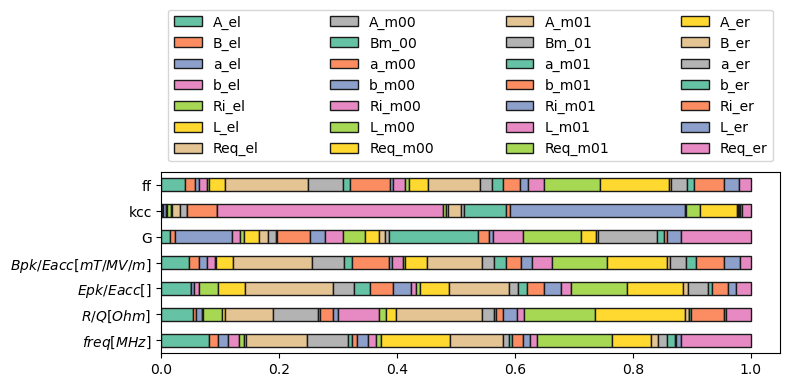

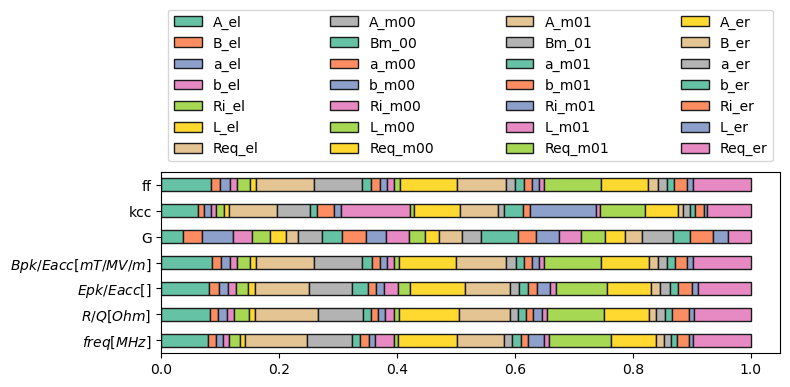

In [135]:
# plot_settings()
plt.rcParams["figure.figsize"] = (8, 4)
# plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)
filefolder = fr"C:\Users\sosoho\DakotaProjects\Cavity\C3794_lhsnormal_dist"
plot_sobol(filefolder)

In [6]:
# dataframe
df =  pd.read_excel(fr'{filefolder}\cubature_nodes.xlsx')

<Axes: xlabel='A_el', ylabel='Density'>

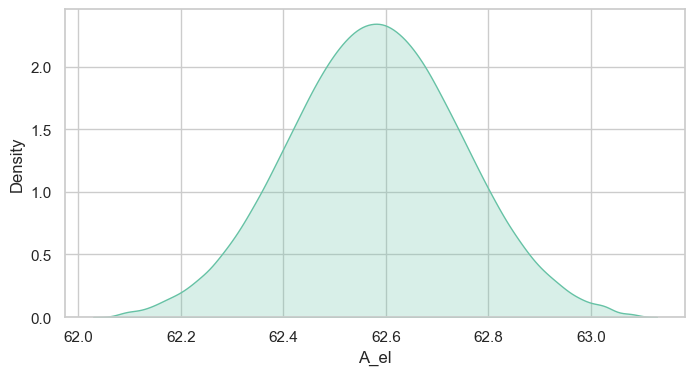

In [125]:
sns.kdeplot(df['A_el'], fill=True)

<Axes: xlabel='freq [MHz]', ylabel='Density'>

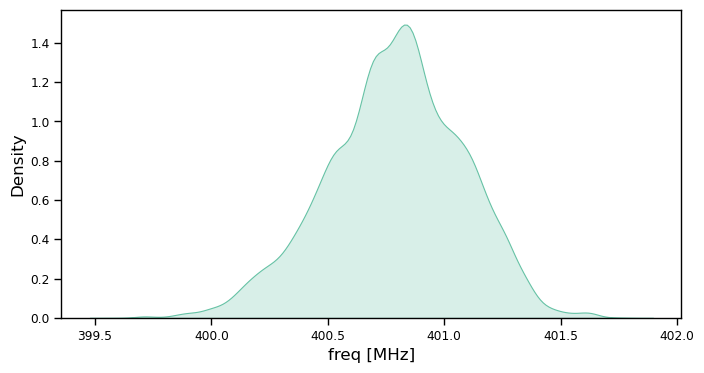

In [21]:
sns.kdeplot(df['freq [MHz]'], fill=True)

<Axes: xlabel='R/Q [Ohm]', ylabel='Density'>

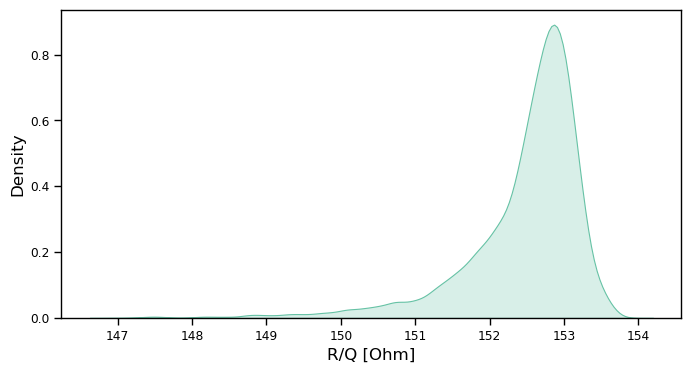

In [22]:
sns.kdeplot(df['R/Q [Ohm]'], fill=True)

<Axes: xlabel='Epk/Eacc []', ylabel='Density'>

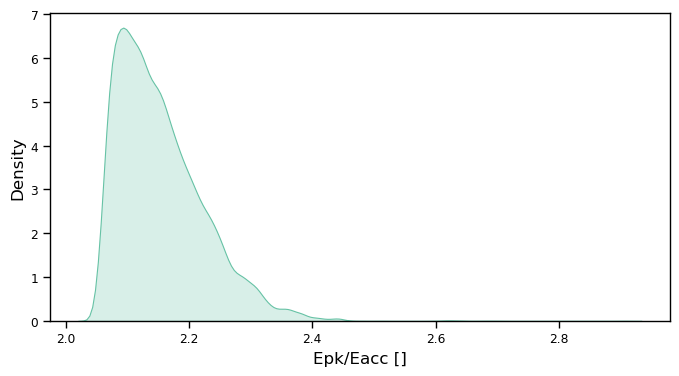

In [23]:
sns.kdeplot(df['Epk/Eacc []'], fill=True)

<Axes: xlabel='Bpk/Eacc [mT/MV/m]', ylabel='Density'>

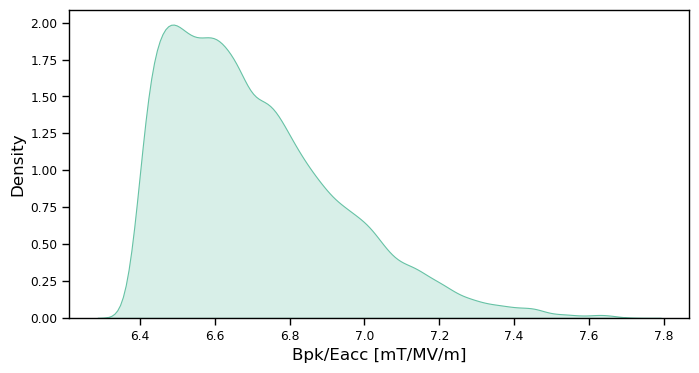

In [24]:
sns.kdeplot(df['Bpk/Eacc [mT/MV/m]'], fill=True)

<Axes: xlabel='G [Ohm]', ylabel='Density'>

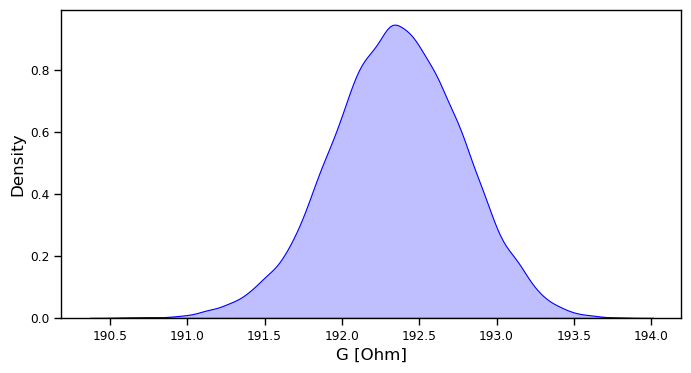

In [25]:
sns.kdeplot(df['G [Ohm]'], color='b', fill=True)

<Axes: xlabel='kcc [%]', ylabel='Density'>

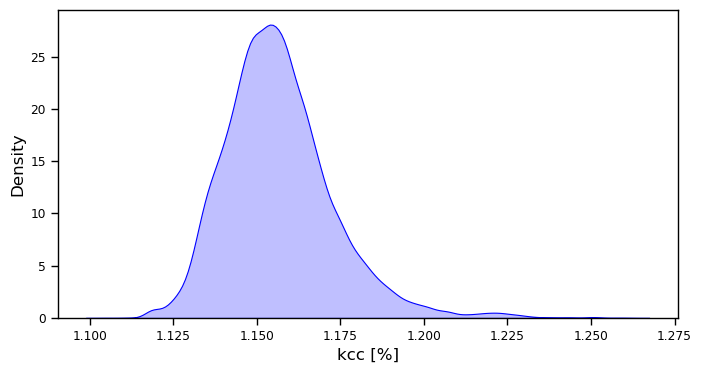

In [26]:
sns.kdeplot(df['kcc [%]'], color='b', fill=True)

<Axes: xlabel='ff [%]', ylabel='Density'>

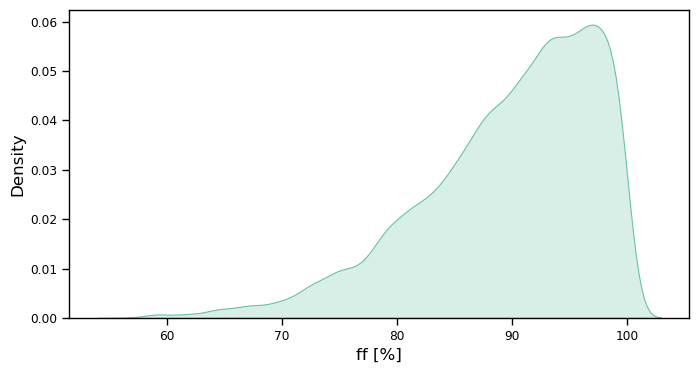

In [27]:
sns.kdeplot(df['ff [%]'], fill=True)

In [99]:
df.columns[-7:]

Index(['freq [MHz]', 'R/Q [Ohm]', 'Epk/Eacc []', 'Bpk/Eacc [mT/MV/m]',
       'G [Ohm]', 'kcc [%]', 'ff [%]'],
      dtype='object')

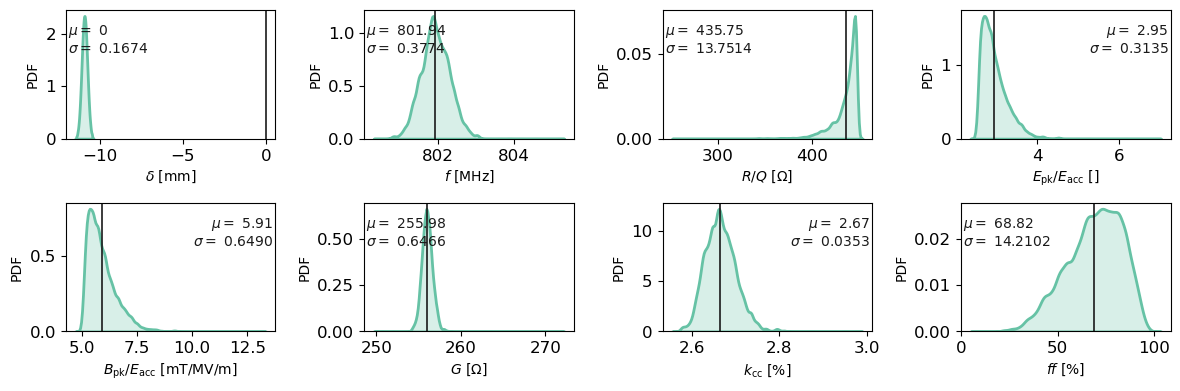

In [228]:
fig, axes = plt.subplots(2, 4, figsize=(12,4))

sns.set_context("paper", rc={"axes.labelsize":15})   

sns.kdeplot(df['A_el']-73.52, fill=True, ax=axes[0, 0], lw=2).set(xlabel='$\delta$ [mm]', ylabel='PDF')
# axes[0, 0].legend(labels=['$A_{\mathrm{el}}$', '$A^{(0)}_{\mathrm{m0}}$', '$A_{\mathrm{er}}$'])
text = '$\mu =$ ' + f"{0}" + '\n$\sigma = $ ' + f"{df['A_el'].std():.4f}"
axes[0, 0].text(0.01, 0.9, text, fontsize = 10, color = "k", ha = "left", va = "top", transform = axes[0, 0].transAxes)

# plot mean
axes[0, 0].axvline(0, c='k')

qois = df.columns[-7:]
xlabels = ['$f$ [MHz]', '$R/Q$ [$\Omega$]', '$E_\mathrm{pk}/E_\mathrm{acc}$ []', '$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]', '$G$ [$\Omega$]', '$k_\mathrm{cc}$ [%]', '$ff$ [%]']
for i in range(2):
    for j in range(4):
        if (i == 0 and j == 0):
            continue
        sns.kdeplot(df[qois[4*i + j - 1]], fill=True, ax=axes[i, j], lw=2).set(xlabel=xlabels[4*i + j - 1], ylabel='PDF')

        # plot mean
        axes[i, j].axvline(df[qois[4*i + j - 1]].mean(), c='k')

        text = '$\mu =$ ' + f"{df[qois[4*i + j - 1]].mean():.2f}" + '\n$\sigma = $ ' + f"{df[qois[4*i + j - 1]].std():.4f}"
        if (4*i + j - 1) in [0,1, 4, 6]:
            axes[i, j].text(0.01, 0.9, text, fontsize = 10, color = "k", ha = "left", va = "top", transform = axes[i, j].transAxes)
        else:
            axes[i, j].text(0.99, 0.9, text, fontsize = 10, color = "k", ha = "right", va = "top", transform = axes[i, j].transAxes)
            
        
# sns.kdeplot(df['R/Q [Ohm]'], fill=True, ax=axes[0, 2], lw=2).set(xlabel='$R/Q$ [$\Omega$]', ylabel='PDF')
# sns.kdeplot(df['Epk/Eacc []'], fill=True, ax=axes[0, 3], lw=2).set(xlabel='$E_\mathrm{pk}/E_\mathrm{acc}$ []', ylabel='PDF')
# sns.kdeplot(df['Bpk/Eacc [mT/MV/m]'], fill=True, ax=axes[1, 0], lw=2).set(xlabel='$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]', ylabel='PDF')
# sns.kdeplot(df['G [Ohm]'], fill=True, ax=axes[1, 1], lw=2).set(xlabel='$G$ [$\Omega$]', ylabel='PDF')
# sns.kdeplot(df['kcc [%]'], fill=True, ax=axes[1, 2], lw=2).set(xlabel='$k_\mathrm{cc}$ [%]', ylabel='PDF')
# sns.kdeplot(df['ff [%]'], fill=True, ax=axes[1, 3], lw=2).set(xlabel='$ff$ [%]', ylabel='PDF')
for ax in axes.flatten():
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig(fr"D:\Dropbox\Quick presentation files\c3794_kde_mc_normal.png")

In [25]:
filefolder = fr"C:\Users\sosoho\DakotaProjects\Cavity\C3794_lhsnormal_dist\dakota_HC.out"
obj = [r"$freq [MHz]$",	fr"$R/Q [Ohm]$", r"$Epk/Eacc []$",	r"$Bpk/Eacc [mT/MV/m]$", 'G', 'kcc', 'ff']
df_sobol = get_sobol_indices(filefolder, obj)

In [26]:
df_sobol

,freq [MHz]_main,freq [MHz]_total,vars,R/Q [Ohm]_main,R/Q [Ohm]_total,Epk/Eacc []_main,Epk/Eacc []_total,Bpk/Eacc [mT/MV/m]_main,Bpk/Eacc [mT/MV/m]_total,G_main,G_total,kcc_main,kcc_total,ff_main,ff_total
0,0.073733,0.097489,A_el,0.015395,0.184589,0.012585,0.240744,0.013846,0.238383,-0.011582,0.158827,-0.000455,0.105166,0.011214,0.235196
1,-0.014123,0.016491,B_el,-0.001141,0.032577,0.000086,0.050190,-0.004938,0.042796,-0.005779,0.134011,0.001432,0.019029,-0.004912,0.043091
2,-0.014643,0.016525,a_el,-0.002797,0.033579,0.001268,0.047097,-0.003622,0.041796,0.075450,0.223496,-0.002516,0.018897,-0.001772,0.044065
3,-0.016636,0.012401,b_el,-0.000870,0.025016,-0.001811,0.039952,-0.004116,0.034643,-0.009595,0.139498,0.001017,0.014548,-0.003945,0.035356
4,-0.008253,0.023415,Ri_el,0.008938,0.058211,0.008224,0.064302,0.000443,0.057149,0.006111,0.126485,-0.003916,0.023355,0.000930,0.058807
5,-0.003077,0.010141,L_el,0.001628,0.022221,0.011427,0.034373,0.008513,0.029302,0.018876,0.119674,0.000561,0.012964,0.007960,0.030528
6,0.094450,0.130134,Req_el,0.022791,0.239605,0.037475,0.272963,0.038941,0.272016,-0.012292,0.089551,-0.008142,0.139861,0.039441,0.272831
7,0.061895,0.094653,A_m00,0.022025,0.172216,0.008812,0.219991,0.016151,0.227063,0.009801,0.171948,0.006868,0.096708,0.016909,0.225033
8,-0.007345,0.017084,Bm_00,0.001016,0.031479,-0.007062,0.081802,-0.003906,0.044974,-0.001830,0.141563,0.000246,0.017940,-0.003386,0.044970
9,-0.007789,0.018388,a_m00,-0.005897,0.026903,-0.009445,0.041369,-0.018087,0.038387,0.043922,0.178320,0.028314,0.051270,-0.019165,0.040030


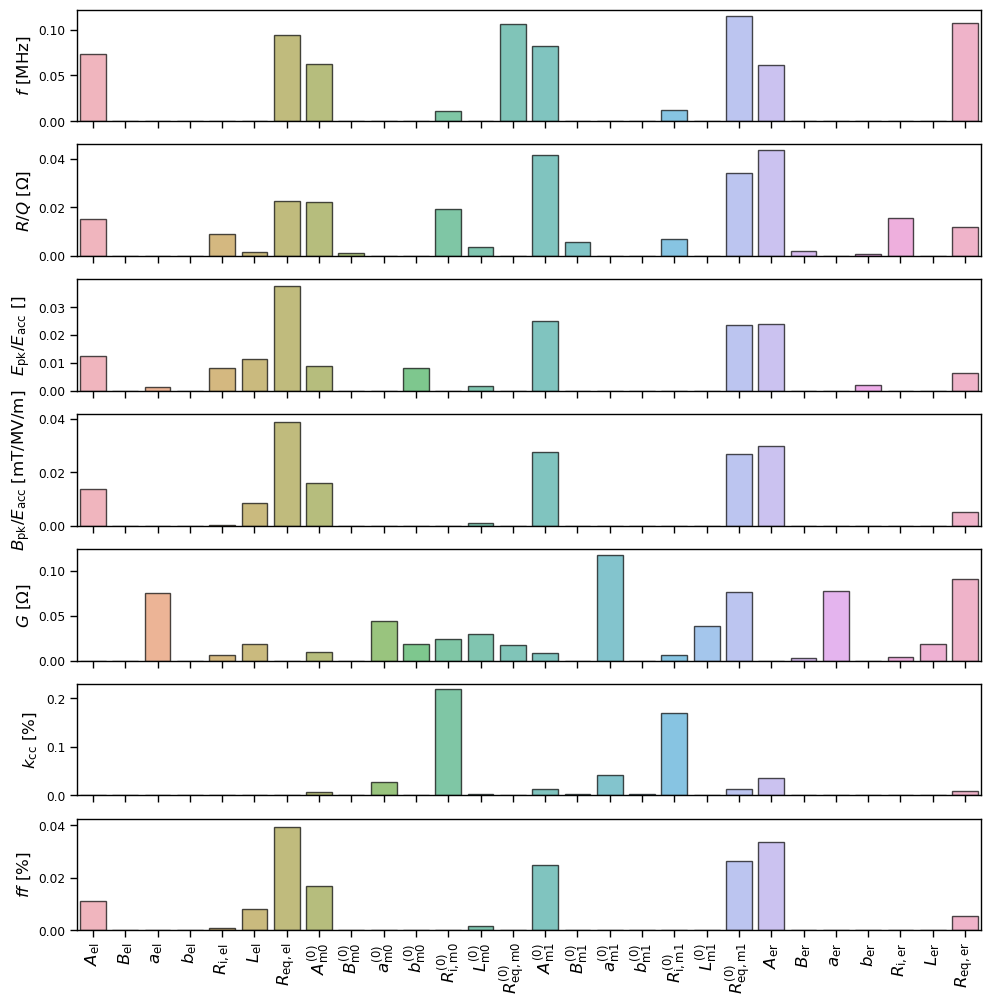

In [27]:
fig, axes = plt.subplots(7, figsize=(10,10), sharex=True)
# fig.subplots_adjust(hspace=0., wspace=0.)

x_ticks_label = ['$A_{\mathrm{el}}$', '$B_{\mathrm{el}}$', '$a_{\mathrm{el}}$', '$b_{\mathrm{el}}$', '$R_{\mathrm{i, el}}$', '$L_{\mathrm{el}}$', '$R_{\mathrm{eq, el}}$',
                 '$A^{(0)}_{\mathrm{m0}}$', '$B^{(0)}_{\mathrm{m0}}$', '$a^{(0)}_{\mathrm{m0}}$', '$b^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{i, m0}}$', '$L^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{eq, m0}}$',
                 '$A^{(0)}_{\mathrm{m1}}$', '$B^{(0)}_{\mathrm{m1}}$', '$a^{(0)}_{\mathrm{m1}}$', '$b^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{i, m1}}$', '$L^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{eq, m1}}$',  
                 '$A_{\mathrm{er}}$', '$B_{\mathrm{er}}$', '$a_{\mathrm{er}}$', '$b_{\mathrm{er}}$', '$R_{\mathrm{i, er}}$', '$L_{\mathrm{er}}$', '$R_{\mathrm{eq, er}}$']

sns.set_context("paper", rc={"axes.labelsize":12})   
sns.barplot(df_sobol, x="vars", y="freq [MHz]_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[0]).set(ylabel='$f$ [MHz]')
sns.barplot(df_sobol, x="vars", y="R/Q [Ohm]_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[1]).set(ylabel='$R/Q$ [$\Omega$]')
sns.barplot(df_sobol, x="vars", y="Epk/Eacc []_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[2]).set(ylabel='$E_\mathrm{pk}/E_\mathrm{acc}$ []')
sns.barplot(df_sobol, x="vars", y="Bpk/Eacc [mT/MV/m]_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[3]).set(ylabel='$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]')
sns.barplot(df_sobol, x="vars", y="G_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[4]).set(ylabel='$G$ [$\Omega$]')
sns.barplot(df_sobol, x="vars", y="kcc_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[5]).set(ylabel='$k_\mathrm{cc}$ [%]')
sns.barplot(df_sobol, x="vars", y="ff_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[6]).set(ylabel='$ff$ [%]', xticklabels=x_ticks_label)
# df_sobol.plot(x="vars", y=["R/Q [Ohm]_main", "R/Q [Ohm]_total"], kind="bar")
# ax = sns.barplot(df_sobol, x="vars", y="Bpk/Eacc [mT/MV/m]_main", color='b', alpha=0.25, linewidth=1.0, edgecolor="0.")
for ax in axes.flatten():
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x', rotation=90)
    ax.set(xlabel=None)
    
# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.savefig(fr"D:\Dropbox\Quick presentation files\sobol_main_indices_mc_uniform.png")

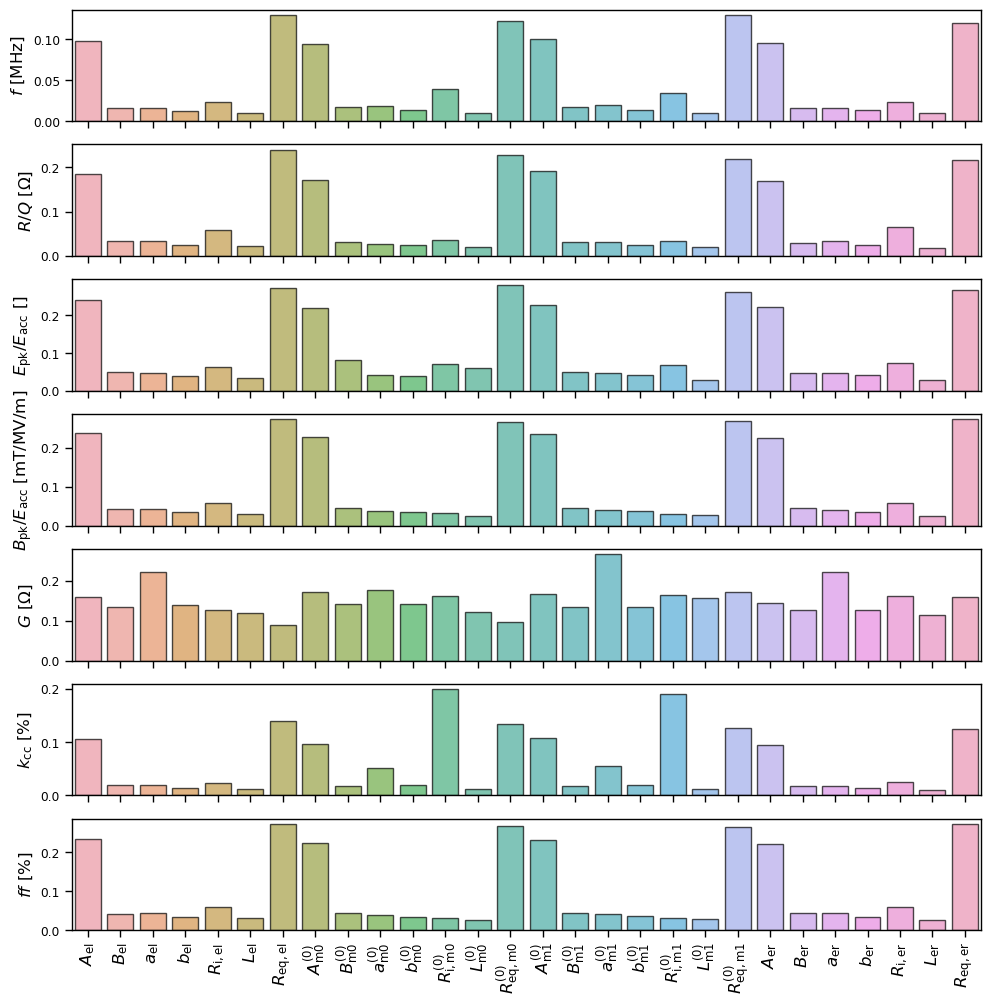

In [28]:
fig, axes = plt.subplots(7, figsize=(10,10), sharex=True)
# fig.subplots_adjust(hspace=0., wspace=0.)

x_ticks_label = ['$A_{\mathrm{el}}$', '$B_{\mathrm{el}}$', '$a_{\mathrm{el}}$', '$b_{\mathrm{el}}$', '$R_{\mathrm{i, el}}$', '$L_{\mathrm{el}}$', '$R_{\mathrm{eq, el}}$',
                 '$A^{(0)}_{\mathrm{m0}}$', '$B^{(0)}_{\mathrm{m0}}$', '$a^{(0)}_{\mathrm{m0}}$', '$b^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{i, m0}}$', '$L^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{eq, m0}}$',
                 '$A^{(0)}_{\mathrm{m1}}$', '$B^{(0)}_{\mathrm{m1}}$', '$a^{(0)}_{\mathrm{m1}}$', '$b^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{i, m1}}$', '$L^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{eq, m1}}$',  
                 '$A_{\mathrm{er}}$', '$B_{\mathrm{er}}$', '$a_{\mathrm{er}}$', '$b_{\mathrm{er}}$', '$R_{\mathrm{i, er}}$', '$L_{\mathrm{er}}$', '$R_{\mathrm{eq, er}}$']

sns.set_context("paper", rc={"axes.labelsize":12})   
sns.barplot(df_sobol, x="vars", y="freq [MHz]_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[0]).set(ylabel='$f$ [MHz]')
sns.barplot(df_sobol, x="vars", y="R/Q [Ohm]_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[1]).set(ylabel='$R/Q$ [$\Omega$]')
sns.barplot(df_sobol, x="vars", y="Epk/Eacc []_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[2]).set(ylabel='$E_\mathrm{pk}/E_\mathrm{acc}$ []')
sns.barplot(df_sobol, x="vars", y="Bpk/Eacc [mT/MV/m]_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[3]).set(ylabel='$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]')
sns.barplot(df_sobol, x="vars", y="G_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[4]).set(ylabel='$G$ [$\Omega$]')
sns.barplot(df_sobol, x="vars", y="kcc_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[5]).set(ylabel='$k_\mathrm{cc}$ [%]')
sns.barplot(df_sobol, x="vars", y="ff_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[6]).set(ylabel='$ff$ [%]', xticklabels=x_ticks_label)
# df_sobol.plot(x="vars", y=["R/Q [Ohm]_main", "R/Q [Ohm]_total"], kind="bar")
# ax = sns.barplot(df_sobol, x="vars", y="Bpk/Eacc [mT/MV/m]_main", color='b', alpha=0.25, linewidth=1.0, edgecolor="0.")
for ax in axes.flatten():
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x', rotation=90)
    ax.set(xlabel=None)
    
# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.xticks(fontsize=12)
plt.savefig(fr"D:\Dropbox\Quick presentation files\sobol_total_indices_mc_uniform.png")

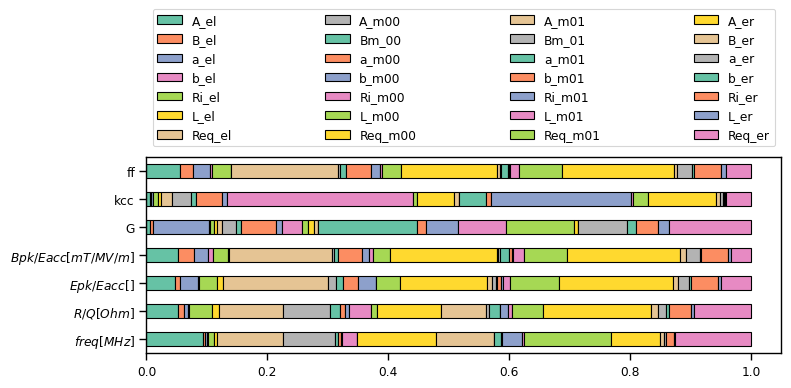

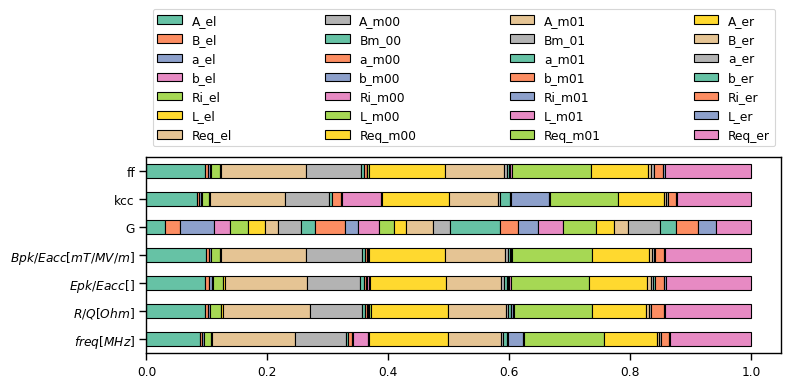

In [17]:
# uniform distribution
# plot_settings()
plt.rcParams["figure.figsize"] = (8, 4)
# plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)
filefolder = fr"C:\Users\sosoho\DakotaProjects\Cavity\C3794_lhs"
plot_sobol(filefolder)

In [18]:
# dataframe
df_normal =  pd.read_excel(fr'{filefolder}\cubature_nodes.xlsx')

<Axes: xlabel='ff [%]', ylabel='Density'>

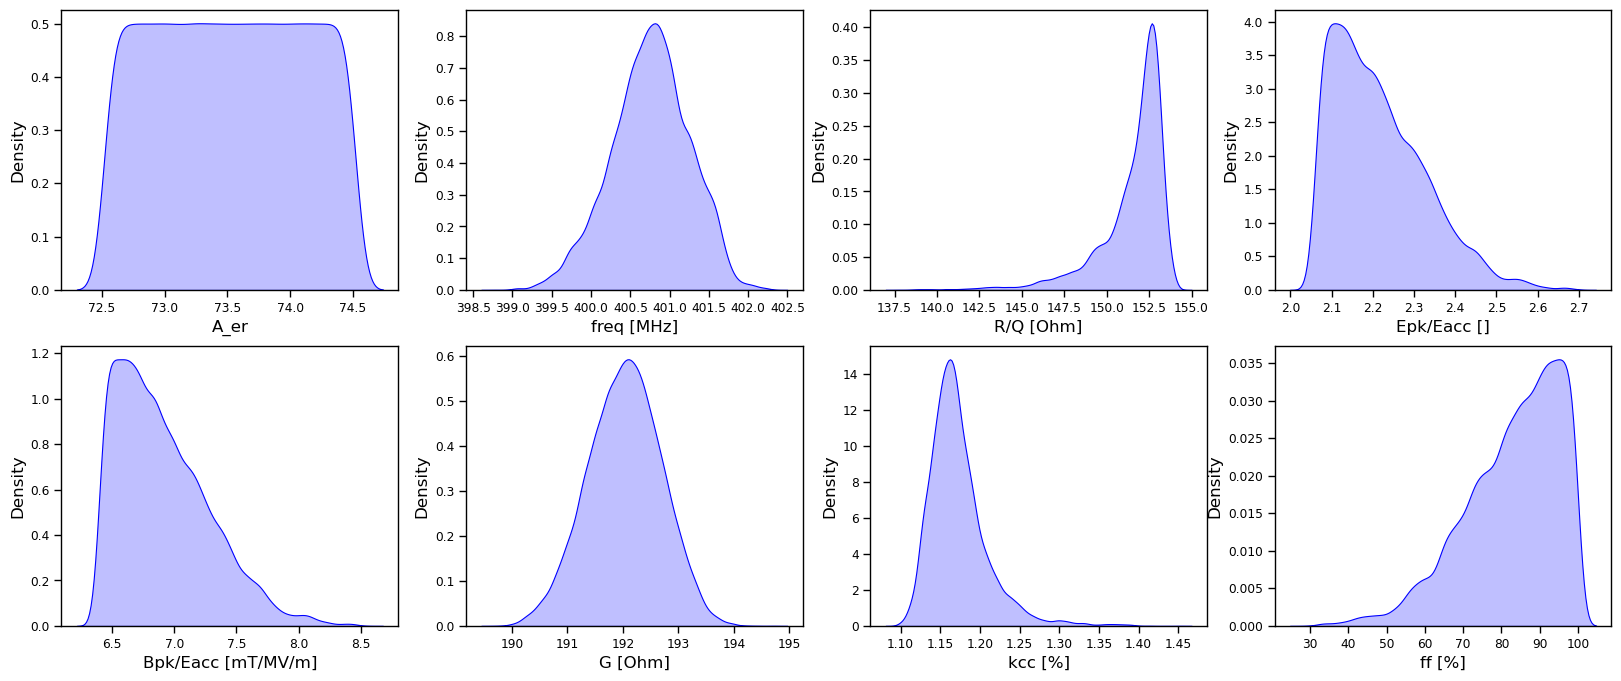

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))

sns.kdeplot(df_normal['A_er'], color='b', fill=True, ax=axes[0, 0])
sns.kdeplot(df_normal['freq [MHz]'], color='b', fill=True, ax=axes[0, 1])
sns.kdeplot(df_normal['R/Q [Ohm]'], color='b', fill=True, ax=axes[0, 2])
sns.kdeplot(df_normal['Epk/Eacc []'], color='b', fill=True, ax=axes[0, 3])
sns.kdeplot(df_normal['Bpk/Eacc [mT/MV/m]'], color='b', fill=True, ax=axes[1, 0])
sns.kdeplot(df_normal['G [Ohm]'], color='b', fill=True, ax=axes[1, 1])
sns.kdeplot(df_normal['kcc [%]'], color='b', fill=True, ax=axes[1, 2])
sns.kdeplot(df_normal['ff [%]'], color='b', fill=True, ax=axes[1, 3])

# C3795

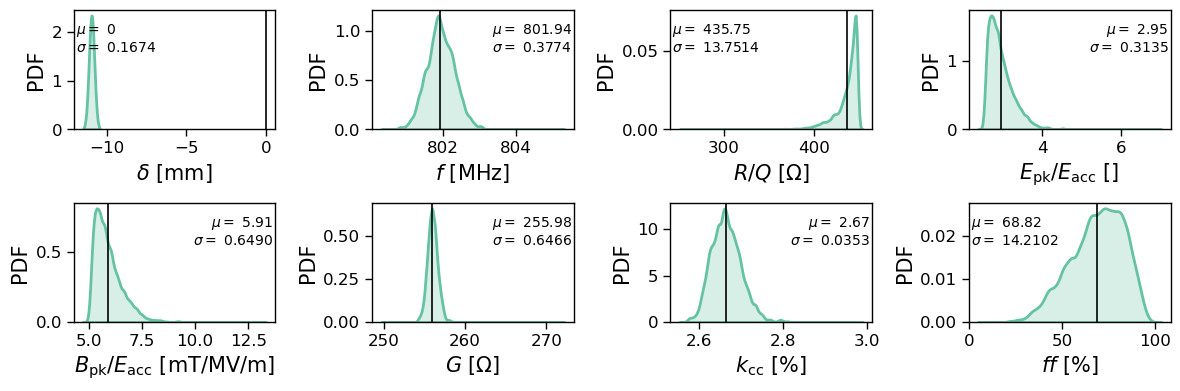

In [12]:
# dataframe
df =  pd.read_excel(fr'C:\Users\sosoho\Downloads\cubature_nodes.xlsx')

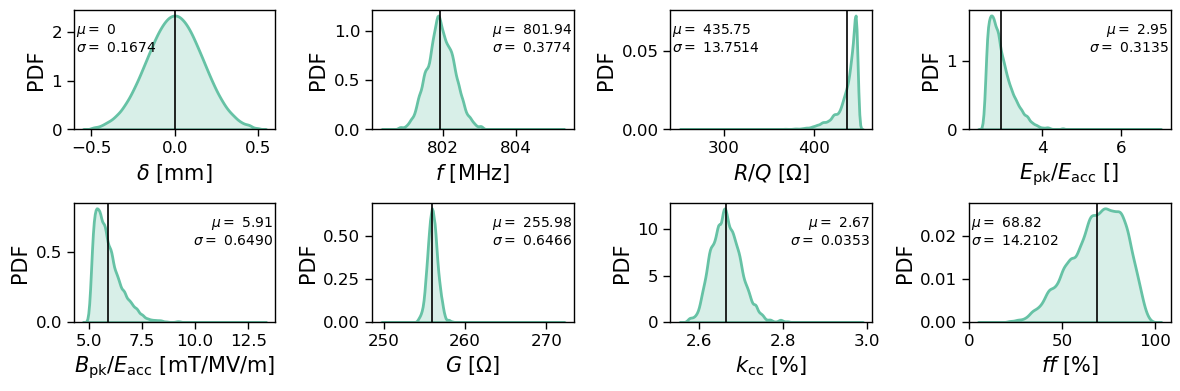

In [14]:

fig, axes = plt.subplots(2, 4, figsize=(12,4))

sns.set_context("paper", rc={"axes.labelsize":15})   

sns.kdeplot(df['A_el']-62.58, fill=True, ax=axes[0, 0], lw=2).set(xlabel='$\delta$ [mm]', ylabel='PDF')
# axes[0, 0].legend(labels=['$A_{\mathrm{el}}$', '$A^{(0)}_{\mathrm{m0}}$', '$A_{\mathrm{er}}$'])
text = '$\mu =$ ' + f"{0}" + '\n$\sigma = $ ' + f"{df['A_el'].std():.4f}"
axes[0, 0].text(0.01, 0.9, text, fontsize = 10, color = "k", ha = "left", va = "top", transform = axes[0, 0].transAxes)

# plot mean
axes[0, 0].axvline(0, c='k')

qois = df.columns[-7:]
xlabels = ['$f$ [MHz]', '$R/Q$ [$\Omega$]', '$E_\mathrm{pk}/E_\mathrm{acc}$ []', '$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]', '$G$ [$\Omega$]', '$k_\mathrm{cc}$ [%]', '$ff$ [%]']
for i in range(2):
    for j in range(4):
        if (i == 0 and j == 0):
            continue
        sns.kdeplot(df[qois[4*i + j - 1]], fill=True, ax=axes[i, j], lw=2).set(xlabel=xlabels[4*i + j - 1], ylabel='PDF')

        # plot mean
        axes[i, j].axvline(df[qois[4*i + j - 1]].mean(), c='k')

        text = '$\mu =$ ' + f"{df[qois[4*i + j - 1]].mean():.2f}" + '\n$\sigma = $ ' + f"{df[qois[4*i + j - 1]].std():.4f}"
        if (4*i + j - 1) in [1, 6]:
            axes[i, j].text(0.01, 0.9, text, fontsize = 10, color = "k", ha = "left", va = "top", transform = axes[i, j].transAxes)
        else:
            axes[i, j].text(0.99, 0.9, text, fontsize = 10, color = "k", ha = "right", va = "top", transform = axes[i, j].transAxes)
            
        
# sns.kdeplot(df['R/Q [Ohm]'], fill=True, ax=axes[0, 2], lw=2).set(xlabel='$R/Q$ [$\Omega$]', ylabel='PDF')
# sns.kdeplot(df['Epk/Eacc []'], fill=True, ax=axes[0, 3], lw=2).set(xlabel='$E_\mathrm{pk}/E_\mathrm{acc}$ []', ylabel='PDF')
# sns.kdeplot(df['Bpk/Eacc [mT/MV/m]'], fill=True, ax=axes[1, 0], lw=2).set(xlabel='$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]', ylabel='PDF')
# sns.kdeplot(df['G [Ohm]'], fill=True, ax=axes[1, 1], lw=2).set(xlabel='$G$ [$\Omega$]', ylabel='PDF')
# sns.kdeplot(df['kcc [%]'], fill=True, ax=axes[1, 2], lw=2).set(xlabel='$k_\mathrm{cc}$ [%]', ylabel='PDF')
# sns.kdeplot(df['ff [%]'], fill=True, ax=axes[1, 3], lw=2).set(xlabel='$ff$ [%]', ylabel='PDF')
for ax in axes.flatten():
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig(fr"D:\Dropbox\Quick presentation files\c3795_kde_mc_normal.png")

In [30]:
filefolder = fr"C:\Users\sosoho\DakotaProjects\Cavity\C3795_lhs\dakota_HC.out"
obj = [r"$freq [MHz]$",	fr"$R/Q [Ohm]$", r"$Epk/Eacc []$",	r"$Bpk/Eacc [mT/MV/m]$", 'G', 'kcc', 'ff']
df_sobol_c3795 = get_sobol_indices(filefolder, obj)

In [31]:
df_sobol_c3795

,freq [MHz]_main,freq [MHz]_total,vars,R/Q [Ohm]_main,R/Q [Ohm]_total,Epk/Eacc []_main,Epk/Eacc []_total,Bpk/Eacc [mT/MV/m]_main,Bpk/Eacc [mT/MV/m]_total,G_main,G_total,kcc_main,kcc_total,ff_main,ff_total
0,0.004674,0.014512,A_el,-0.001593,0.046903,-0.000814,0.064710,0.003641,0.061487,0.012402,0.027735,0.003333,0.018391,0.001106,0.059603
1,-0.001349,0.002226,B_el,-0.007005,0.007355,-0.008219,0.012681,-0.006262,0.009422,0.006809,0.010204,-0.001623,0.002827,-0.009101,0.009112
2,-0.000785,0.001719,a_el,0.003277,0.005754,0.002758,0.018434,0.005114,0.007406,0.004342,0.017635,0.002481,0.002129,0.006692,0.007123
3,0.001243,0.000322,b_el,-0.001692,0.001074,-0.006636,0.007195,-0.002253,0.001404,0.003442,0.010912,-0.001035,0.000401,-0.001699,0.001278
4,0.002541,0.003449,Ri_el,-0.010662,0.012037,-0.015322,0.017901,-0.014610,0.015085,0.007780,0.019225,-0.001707,0.004307,-0.011686,0.014162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.002475,0.001840,a_er,0.005742,0.005706,0.001290,0.014352,0.005809,0.007579,0.009682,0.020959,0.003780,0.002296,0.006827,0.007202
66,0.000642,0.000323,b_er,-0.000720,0.001043,-0.002473,0.004909,-0.001008,0.001375,0.003375,0.021333,-0.000567,0.000403,-0.001396,0.001274
67,0.002542,0.003198,Ri_er,0.001358,0.011092,0.001964,0.017372,0.005376,0.013647,0.003542,0.008884,0.001857,0.003964,0.005297,0.013118
68,0.001555,0.002385,L_er,-0.005538,0.007684,-0.006347,0.016628,-0.006799,0.010424,-0.000923,0.010353,0.003097,0.002956,-0.006506,0.009680


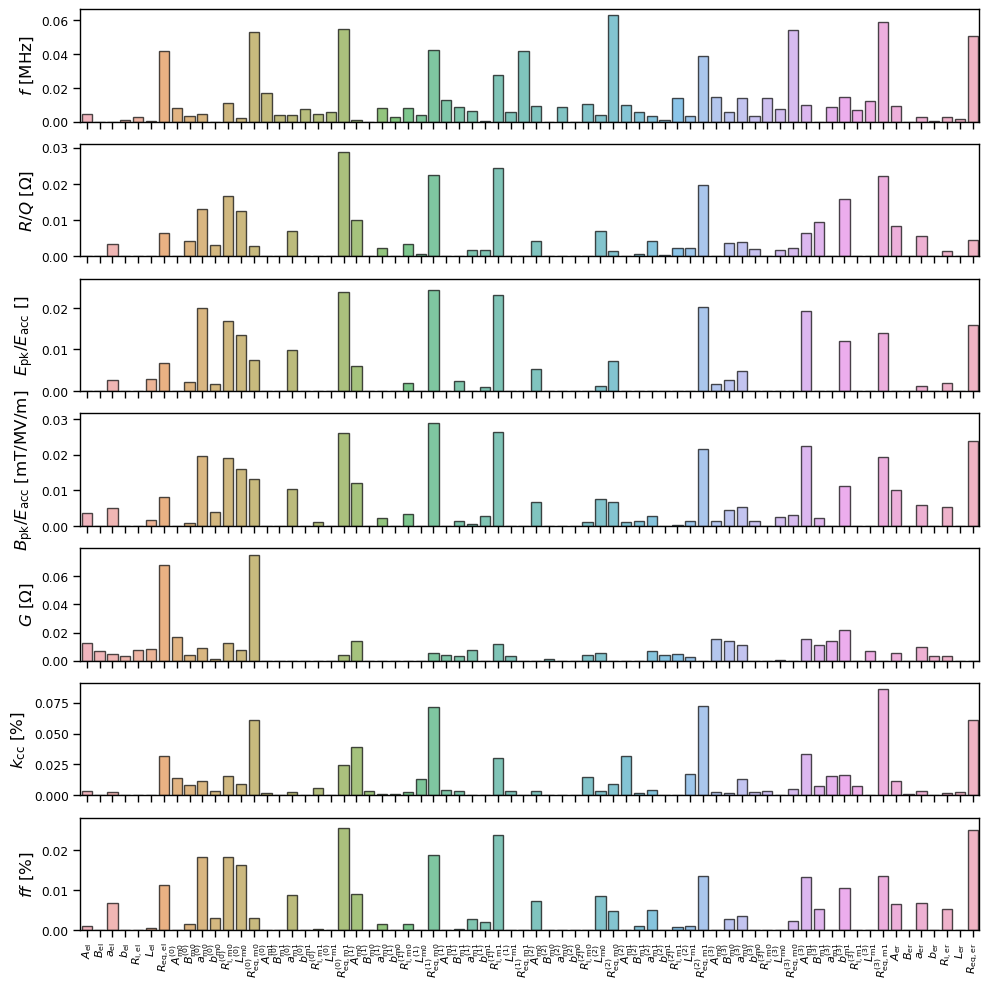

In [39]:
fig, axes = plt.subplots(7, figsize=(10,10), sharex=True)
# fig.subplots_adjust(hspace=0., wspace=0.)

x_ticks_label = ['$A_{\mathrm{el}}$', '$B_{\mathrm{el}}$', '$a_{\mathrm{el}}$', '$b_{\mathrm{el}}$', '$R_{\mathrm{i, el}}$', '$L_{\mathrm{el}}$', '$R_{\mathrm{eq, el}}$',
                 '$A^{(0)}_{\mathrm{m0}}$', '$B^{(0)}_{\mathrm{m0}}$', '$a^{(0)}_{\mathrm{m0}}$', '$b^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{i, m0}}$', '$L^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{eq, m0}}$',
                 '$A^{(0)}_{\mathrm{m1}}$', '$B^{(0)}_{\mathrm{m1}}$', '$a^{(0)}_{\mathrm{m1}}$', '$b^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{i, m1}}$', '$L^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{eq, m1}}$',  
                 
                 '$A^{(1)}_{\mathrm{m0}}$', '$B^{(1)}_{\mathrm{m0}}$', '$a^{(1)}_{\mathrm{m0}}$', '$b^{(1)}_{\mathrm{m0}}$', '$R^{(1)}_{\mathrm{i, m0}}$', '$L^{(1)}_{\mathrm{m0}}$', '$R^{(1)}_{\mathrm{eq, m0}}$',
                 '$A^{(1)}_{\mathrm{m1}}$', '$B^{(1)}_{\mathrm{m1}}$', '$a^{(1)}_{\mathrm{m1}}$', '$b^{(1)}_{\mathrm{m1}}$', '$R^{(1)}_{\mathrm{i, m1}}$', '$L^{(1)}_{\mathrm{m1}}$', '$R^{(1)}_{\mathrm{eq, m1}}$',  
                 
                 '$A^{(2)}_{\mathrm{m0}}$', '$B^{(2)}_{\mathrm{m0}}$', '$a^{(2)}_{\mathrm{m0}}$', '$b^{(2)}_{\mathrm{m0}}$', '$R^{(2)}_{\mathrm{i, m0}}$', '$L^{(2)}_{\mathrm{m0}}$', '$R^{(2)}_{\mathrm{eq, m0}}$',
                 '$A^{(2)}_{\mathrm{m1}}$', '$B^{(2)}_{\mathrm{m1}}$', '$a^{(2)}_{\mathrm{m1}}$', '$b^{(2)}_{\mathrm{m1}}$', '$R^{(2)}_{\mathrm{i, m1}}$', '$L^{(2)}_{\mathrm{m1}}$', '$R^{(2)}_{\mathrm{eq, m1}}$',  
                 
                 '$A^{(3)}_{\mathrm{m0}}$', '$B^{(3)}_{\mathrm{m0}}$', '$a^{(3)}_{\mathrm{m0}}$', '$b^{(3)}_{\mathrm{m0}}$', '$R^{(3)}_{\mathrm{i, m0}}$', '$L^{(3)}_{\mathrm{m0}}$', '$R^{(3)}_{\mathrm{eq, m0}}$',
                 '$A^{(3)}_{\mathrm{m1}}$', '$B^{(3)}_{\mathrm{m1}}$', '$a^{(3)}_{\mathrm{m1}}$', '$b^{(3)}_{\mathrm{m1}}$', '$R^{(3)}_{\mathrm{i, m1}}$', '$L^{(3)}_{\mathrm{m1}}$', '$R^{(3)}_{\mathrm{eq, m1}}$',  
                 '$A_{\mathrm{er}}$', '$B_{\mathrm{er}}$', '$a_{\mathrm{er}}$', '$b_{\mathrm{er}}$', '$R_{\mathrm{i, er}}$', '$L_{\mathrm{er}}$', '$R_{\mathrm{eq, er}}$']

sns.set_context("paper", rc={"axes.labelsize":12})   
sns.barplot(df_sobol_c3795, x="vars", y="freq [MHz]_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[0]).set(ylabel='$f$ [MHz]')
sns.barplot(df_sobol_c3795, x="vars", y="R/Q [Ohm]_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[1]).set(ylabel='$R/Q$ [$\Omega$]')
sns.barplot(df_sobol_c3795, x="vars", y="Epk/Eacc []_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[2]).set(ylabel='$E_\mathrm{pk}/E_\mathrm{acc}$ []')
sns.barplot(df_sobol_c3795, x="vars", y="Bpk/Eacc [mT/MV/m]_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[3]).set(ylabel='$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]')
sns.barplot(df_sobol_c3795, x="vars", y="G_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[4]).set(ylabel='$G$ [$\Omega$]')
sns.barplot(df_sobol_c3795, x="vars", y="kcc_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[5]).set(ylabel='$k_\mathrm{cc}$ [%]')
sns.barplot(df_sobol_c3795, x="vars", y="ff_main", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[6]).set(ylabel='$ff$ [%]', xticklabels=x_ticks_label)
# df_sobol.plot(x="vars", y=["R/Q [Ohm]_main", "R/Q [Ohm]_total"], kind="bar")
# ax = sns.barplot(df_sobol, x="vars", y="Bpk/Eacc [mT/MV/m]_main", color='b', alpha=0.25, linewidth=1.0, edgecolor="0.")
for ax in axes.flatten():
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x', rotation=90)
    ax.set(xlabel=None)
    
# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.xticks(fontsize=8)
plt.savefig(fr"D:\Dropbox\Quick presentation files\sobol_main_indices_mc_uniform_c3795.png")

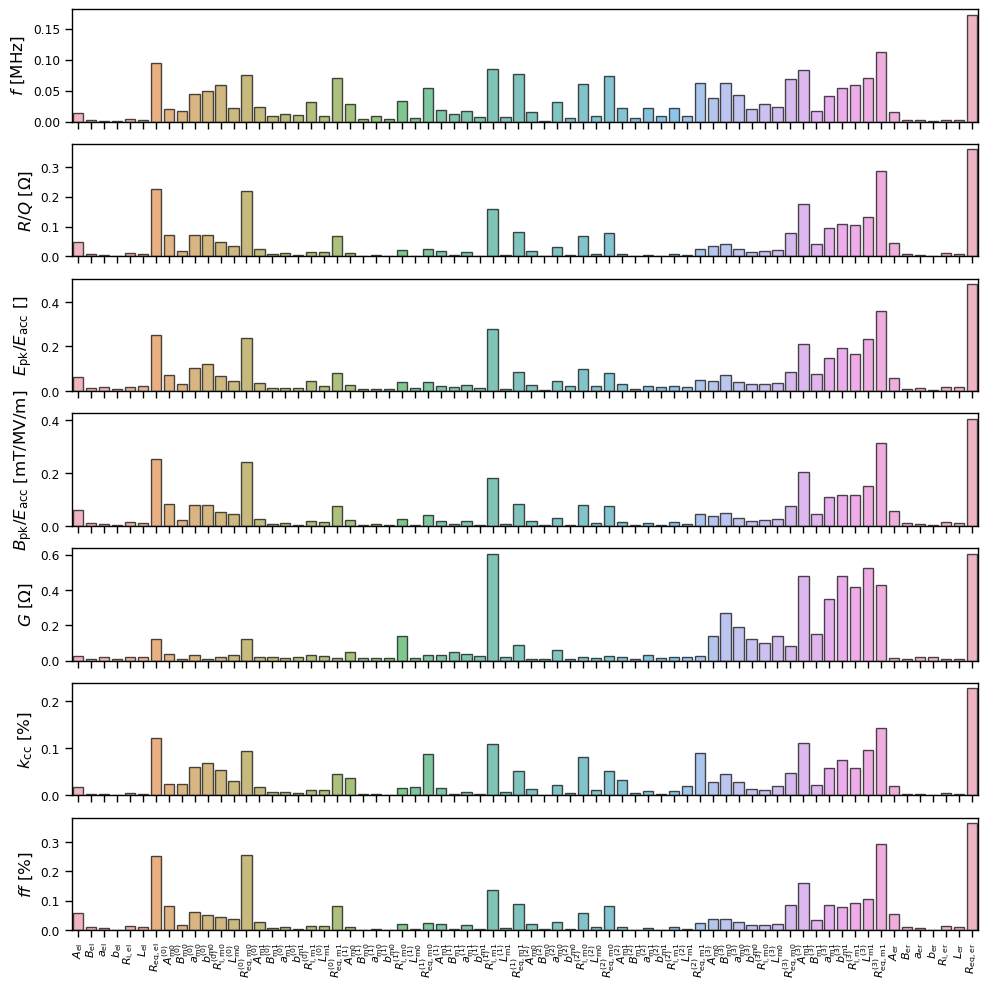

In [38]:
fig, axes = plt.subplots(7, figsize=(10,10), sharex=True)
# fig.subplots_adjust(hspace=0., wspace=0.)

x_ticks_label = ['$A_{\mathrm{el}}$', '$B_{\mathrm{el}}$', '$a_{\mathrm{el}}$', '$b_{\mathrm{el}}$', '$R_{\mathrm{i, el}}$', '$L_{\mathrm{el}}$', '$R_{\mathrm{eq, el}}$',
                 '$A^{(0)}_{\mathrm{m0}}$', '$B^{(0)}_{\mathrm{m0}}$', '$a^{(0)}_{\mathrm{m0}}$', '$b^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{i, m0}}$', '$L^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{eq, m0}}$',
                 '$A^{(0)}_{\mathrm{m1}}$', '$B^{(0)}_{\mathrm{m1}}$', '$a^{(0)}_{\mathrm{m1}}$', '$b^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{i, m1}}$', '$L^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{eq, m1}}$',  
                 
                 '$A^{(1)}_{\mathrm{m0}}$', '$B^{(1)}_{\mathrm{m0}}$', '$a^{(1)}_{\mathrm{m0}}$', '$b^{(1)}_{\mathrm{m0}}$', '$R^{(1)}_{\mathrm{i, m0}}$', '$L^{(1)}_{\mathrm{m0}}$', '$R^{(1)}_{\mathrm{eq, m0}}$',
                 '$A^{(1)}_{\mathrm{m1}}$', '$B^{(1)}_{\mathrm{m1}}$', '$a^{(1)}_{\mathrm{m1}}$', '$b^{(1)}_{\mathrm{m1}}$', '$R^{(1)}_{\mathrm{i, m1}}$', '$L^{(1)}_{\mathrm{m1}}$', '$R^{(1)}_{\mathrm{eq, m1}}$',  
                 
                 '$A^{(2)}_{\mathrm{m0}}$', '$B^{(2)}_{\mathrm{m0}}$', '$a^{(2)}_{\mathrm{m0}}$', '$b^{(2)}_{\mathrm{m0}}$', '$R^{(2)}_{\mathrm{i, m0}}$', '$L^{(2)}_{\mathrm{m0}}$', '$R^{(2)}_{\mathrm{eq, m0}}$',
                 '$A^{(2)}_{\mathrm{m1}}$', '$B^{(2)}_{\mathrm{m1}}$', '$a^{(2)}_{\mathrm{m1}}$', '$b^{(2)}_{\mathrm{m1}}$', '$R^{(2)}_{\mathrm{i, m1}}$', '$L^{(2)}_{\mathrm{m1}}$', '$R^{(2)}_{\mathrm{eq, m1}}$',  
                 
                 '$A^{(3)}_{\mathrm{m0}}$', '$B^{(3)}_{\mathrm{m0}}$', '$a^{(3)}_{\mathrm{m0}}$', '$b^{(3)}_{\mathrm{m0}}$', '$R^{(3)}_{\mathrm{i, m0}}$', '$L^{(3)}_{\mathrm{m0}}$', '$R^{(3)}_{\mathrm{eq, m0}}$',
                 '$A^{(3)}_{\mathrm{m1}}$', '$B^{(3)}_{\mathrm{m1}}$', '$a^{(3)}_{\mathrm{m1}}$', '$b^{(3)}_{\mathrm{m1}}$', '$R^{(3)}_{\mathrm{i, m1}}$', '$L^{(3)}_{\mathrm{m1}}$', '$R^{(3)}_{\mathrm{eq, m1}}$',  
                 '$A_{\mathrm{er}}$', '$B_{\mathrm{er}}$', '$a_{\mathrm{er}}$', '$b_{\mathrm{er}}$', '$R_{\mathrm{i, er}}$', '$L_{\mathrm{er}}$', '$R_{\mathrm{eq, er}}$']

sns.set_context("paper", rc={"axes.labelsize":12})   
sns.barplot(df_sobol_c3795, x="vars", y="freq [MHz]_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[0]).set(ylabel='$f$ [MHz]')
sns.barplot(df_sobol_c3795, x="vars", y="R/Q [Ohm]_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[1]).set(ylabel='$R/Q$ [$\Omega$]')
sns.barplot(df_sobol_c3795, x="vars", y="Epk/Eacc []_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[2]).set(ylabel='$E_\mathrm{pk}/E_\mathrm{acc}$ []')
sns.barplot(df_sobol_c3795, x="vars", y="Bpk/Eacc [mT/MV/m]_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[3]).set(ylabel='$B_\mathrm{pk}/E_\mathrm{acc}$ [mT/MV/m]')
sns.barplot(df_sobol_c3795, x="vars", y="G_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[4]).set(ylabel='$G$ [$\Omega$]')
sns.barplot(df_sobol_c3795, x="vars", y="kcc_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[5]).set(ylabel='$k_\mathrm{cc}$ [%]')
sns.barplot(df_sobol_c3795, x="vars", y="ff_total", alpha=0.7, linewidth=1.0, edgecolor="0.", ax=axes[6]).set(ylabel='$ff$ [%]', xticklabels=x_ticks_label)
# df_sobol.plot(x="vars", y=["R/Q [Ohm]_main", "R/Q [Ohm]_total"], kind="bar")
# ax = sns.barplot(df_sobol, x="vars", y="Bpk/Eacc [mT/MV/m]_main", color='b', alpha=0.25, linewidth=1.0, edgecolor="0.")
for ax in axes.flatten():
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x', rotation=90)
    ax.set(xlabel=None)
    
# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.xticks(fontsize=8)
plt.savefig(fr"D:\Dropbox\Quick presentation files\sobol_total_indices_mc_uniform_c3795.png")

# Plot compare sensitivities

In [208]:

filefolder_1 = fr"C:\Users\sosoho\DakotaProjects\Cavity\C3794_cubature3_5\dakota_HC.out"
filefolder_2 = fr"C:\Users\sosoho\DakotaProjects\Cavity\C3794_cubature5_5\dakota_HC.out"
filefolder_3 = fr"C:\Users\sosoho\DakotaProjects\Cavity\C3794_lhs_var5_uniform\dakota_HC.out"
obj = [r"$freq [MHz]$",	fr"$R/Q [Ohm]$", r"$Epk/Eacc []$",	r"$Bpk/Eacc [mT/MV/m]$", 'G', 'kcc', 'ff']

df_1 = get_sobol_indices(filefolder_1, obj)
df_2 = get_sobol_indices(filefolder_2, obj)
df_3 = get_sobol_indices(filefolder_3, obj)

# Add 'Source' column to indicate the dataframe source
df_1['Source'] = 'Stroud3'
df_2['Source'] = 'Stroud5'
df_3['Source'] = 'LHS'

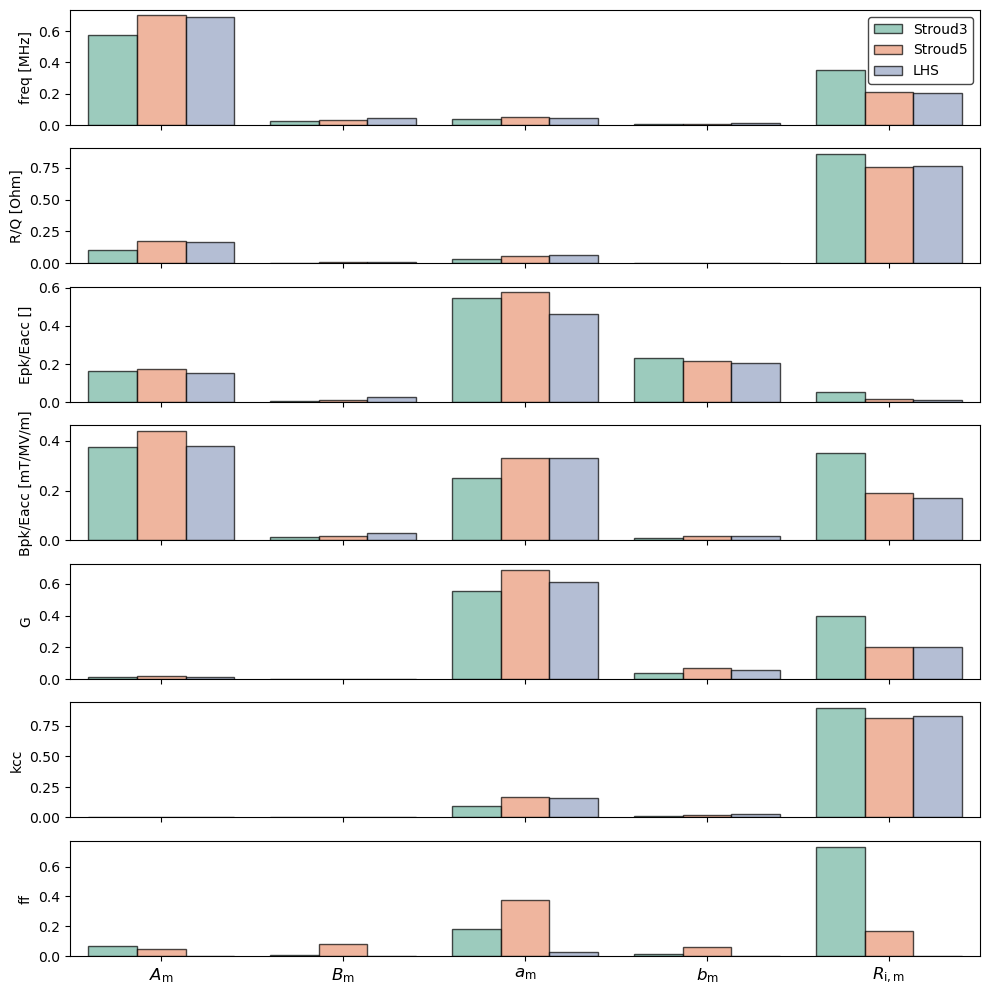

In [214]:
fig, axes = plt.subplots(7, figsize=(10,10), sharex=True)
pars = df_1.columns
x_ticks_label = ['$A_{\mathrm{m}}$', '$B_{\mathrm{m}}$', '$a_{\mathrm{m}}$', '$b_{\mathrm{m}}$', '$R_{\mathrm{i, m}}$']

ni = 0
for par in pars:
    if 'main' in par:
        # Concatenate the dataframes
        cols = ['Source', 'vars', par]
        combined_df = pd.concat([df_1[cols], df_2[cols], df_3[cols]])

        # Use seaborn barplot for comparison with hue based on 'Source'
    #     sns.barplot(x='vars', y=par, hue='Source', data=combined_df, errorbar=None, dodge=True)
            
        sns.barplot(combined_df, x="vars", y=par, hue='Source', alpha=0.7, linewidth=1.0, 
                    edgecolor="0.", ax=axes[ni], errorbar=None, dodge=True).set(ylabel=par.replace('_main', ''))
        # hidethe legend
        axes[ni].get_legend().set_visible(False)
        ni += 1
        
axes[0].legend(fancybox=True, facecolor='None', edgecolor='k')
for ax in axes.flatten():
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x')
    ax.set(xlabel=None)
    
# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.xticks(fontsize=12)
axes[-1].set_xticklabels(x_ticks_label)

plt.savefig(fr"D:\Dropbox\Quick presentation files\sobol_main_indices_comparison_c3794.png")
# Show the plot
plt.show()

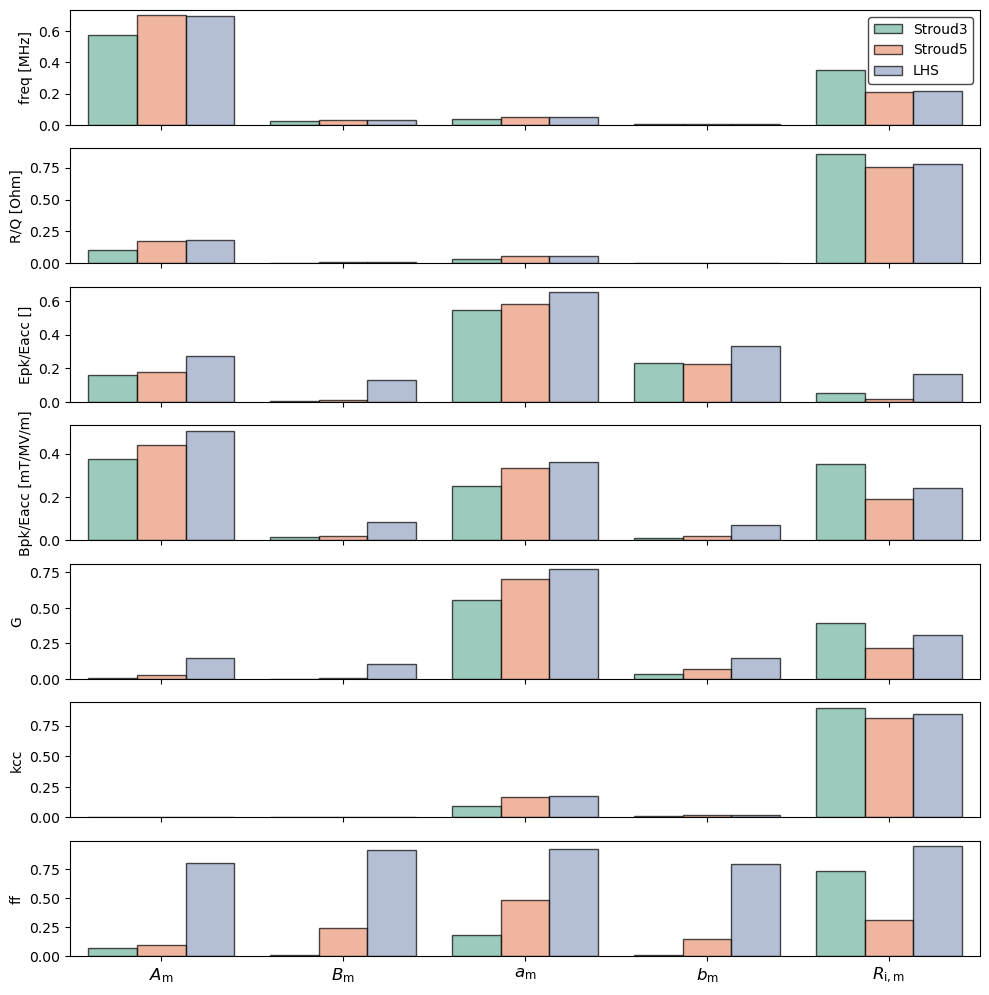

In [215]:
fig, axes = plt.subplots(7, figsize=(10,10), sharex=True)
pars = df_1.columns
x_ticks_label = ['$A_{\mathrm{m}}$', '$B_{\mathrm{m}}$', '$a_{\mathrm{m}}$', '$b_{\mathrm{m}}$', '$R_{\mathrm{i, m}}$']

ni = 0
for par in pars:
    if 'total' in par:
        # Concatenate the dataframes
        cols = ['Source', 'vars', par]
        combined_df = pd.concat([df_1[cols], df_2[cols], df_3[cols]])

        # Use seaborn barplot for comparison with hue based on 'Source'
    #     sns.barplot(x='vars', y=par, hue='Source', data=combined_df, errorbar=None, dodge=True)
            
        sns.barplot(combined_df, x="vars", y=par, hue='Source', alpha=0.7, linewidth=1.0, 
                    edgecolor="0.", ax=axes[ni], errorbar=None, dodge=True).set(ylabel=par.replace('_total', ''))
        # hidethe legend
        axes[ni].get_legend().set_visible(False)
        ni += 1


axes[0].legend(fancybox=True, facecolor='None', edgecolor='k')
for ax in axes.flatten():
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x')
    ax.set(xlabel=None)
    
# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.xticks(fontsize=12)
axes[-1].set_xticklabels(x_ticks_label)

plt.savefig(fr"D:\Dropbox\Quick presentation files\sobol_total_indices_comparison_c3794.png")
# Show the plot
plt.show()

In [219]:

filefolder_1 = fr"C:\Users\sosoho\DakotaProjects\Cavity\C3794_cubature3_28\dakota_HC.out"
filefolder_2 = fr"C:\Users\sosoho\DakotaProjects\Cavity\C3794_cubature5_28\dakota_HC.out"
filefolder_3 = fr"C:\Users\sosoho\DakotaProjects\Cavity\C3794_lhs_uniform_dist\dakota_HC.out"
obj = [r"$freq [MHz]$",	fr"$R/Q [Ohm]$", r"$Epk/Eacc []$",	r"$Bpk/Eacc [mT/MV/m]$", 'G', 'kcc', 'ff']

df_1 = get_sobol_indices(filefolder_1, obj)
df_2 = get_sobol_indices(filefolder_2, obj)
df_3 = get_sobol_indices(filefolder_3, obj)

# Add 'Source' column to indicate the dataframe source
df_1['Source'] = 'Stroud3'
df_2['Source'] = 'Stroud5'
df_3['Source'] = 'LHS'

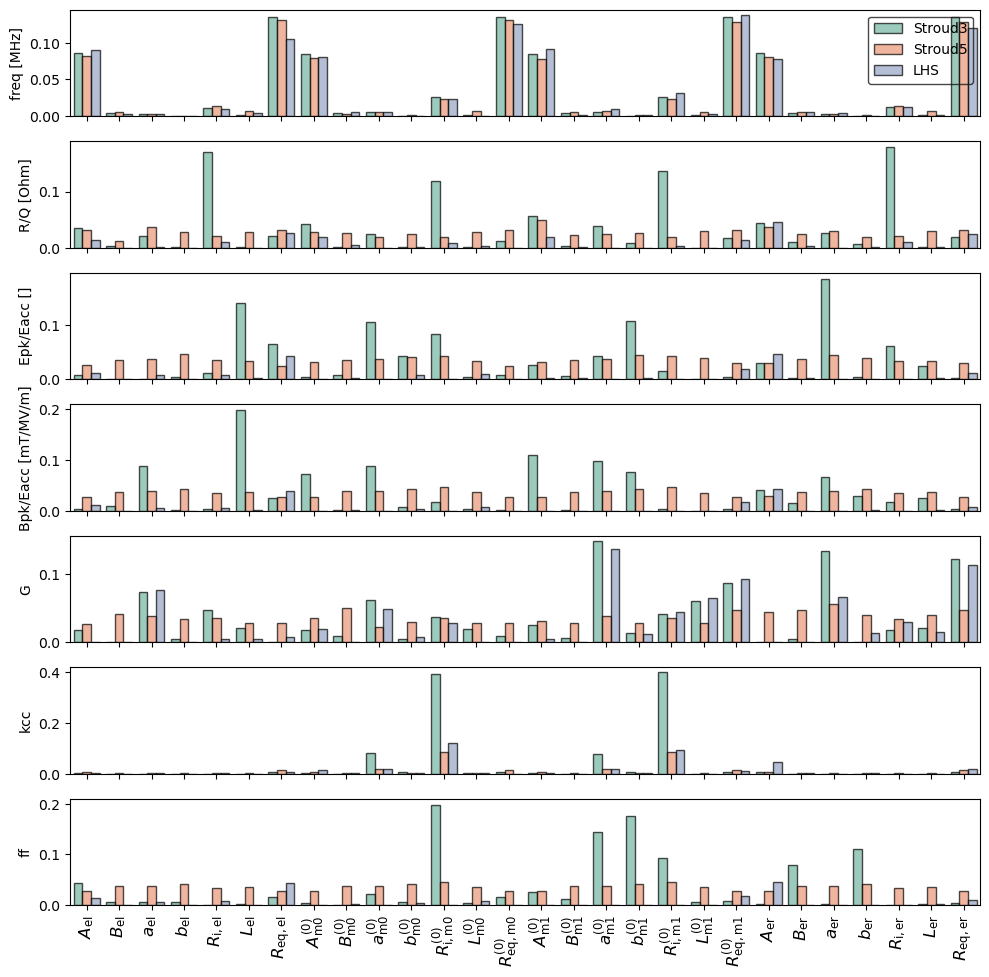

In [226]:
fig, axes = plt.subplots(7, figsize=(10,10), sharex=True)
pars = df_1.columns
x_ticks_label = ['$A_{\mathrm{el}}$', '$B_{\mathrm{el}}$', '$a_{\mathrm{el}}$', '$b_{\mathrm{el}}$', '$R_{\mathrm{i, el}}$', '$L_{\mathrm{el}}$', '$R_{\mathrm{eq, el}}$',
                 '$A^{(0)}_{\mathrm{m0}}$', '$B^{(0)}_{\mathrm{m0}}$', '$a^{(0)}_{\mathrm{m0}}$', '$b^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{i, m0}}$', '$L^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{eq, m0}}$',
                 '$A^{(0)}_{\mathrm{m1}}$', '$B^{(0)}_{\mathrm{m1}}$', '$a^{(0)}_{\mathrm{m1}}$', '$b^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{i, m1}}$', '$L^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{eq, m1}}$',  
                 '$A_{\mathrm{er}}$', '$B_{\mathrm{er}}$', '$a_{\mathrm{er}}$', '$b_{\mathrm{er}}$', '$R_{\mathrm{i, er}}$', '$L_{\mathrm{er}}$', '$R_{\mathrm{eq, er}}$']

ni = 0
for par in pars:
    if 'main' in par:
        # Concatenate the dataframes
        cols = ['Source', 'vars', par]
        combined_df = pd.concat([df_1[cols], df_2[cols], df_3[cols]])

        # Use seaborn barplot for comparison with hue based on 'Source'
    #     sns.barplot(x='vars', y=par, hue='Source', data=combined_df, errorbar=None, dodge=True)
            
        sns.barplot(combined_df, x="vars", y=par, hue='Source', alpha=0.7, linewidth=1.0, 
                    edgecolor="0.", ax=axes[ni], errorbar=None, dodge=True).set(ylabel=par.replace('_main', ''))
        # hidethe legend
        axes[ni].get_legend().set_visible(False)
        ni += 1

axes[0].legend(fancybox=True, facecolor='None', edgecolor='k', loc='upper right')

for ax in axes.flatten():
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x', rotation=90)
    ax.set(xlabel=None)
    
# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.xticks(fontsize=12)
axes[-1].set_xticklabels(x_ticks_label)

plt.savefig(fr"D:\Dropbox\Quick presentation files\sobol_main_indices_comparison_c3794_vars28.png")
# Show the plot
plt.show()

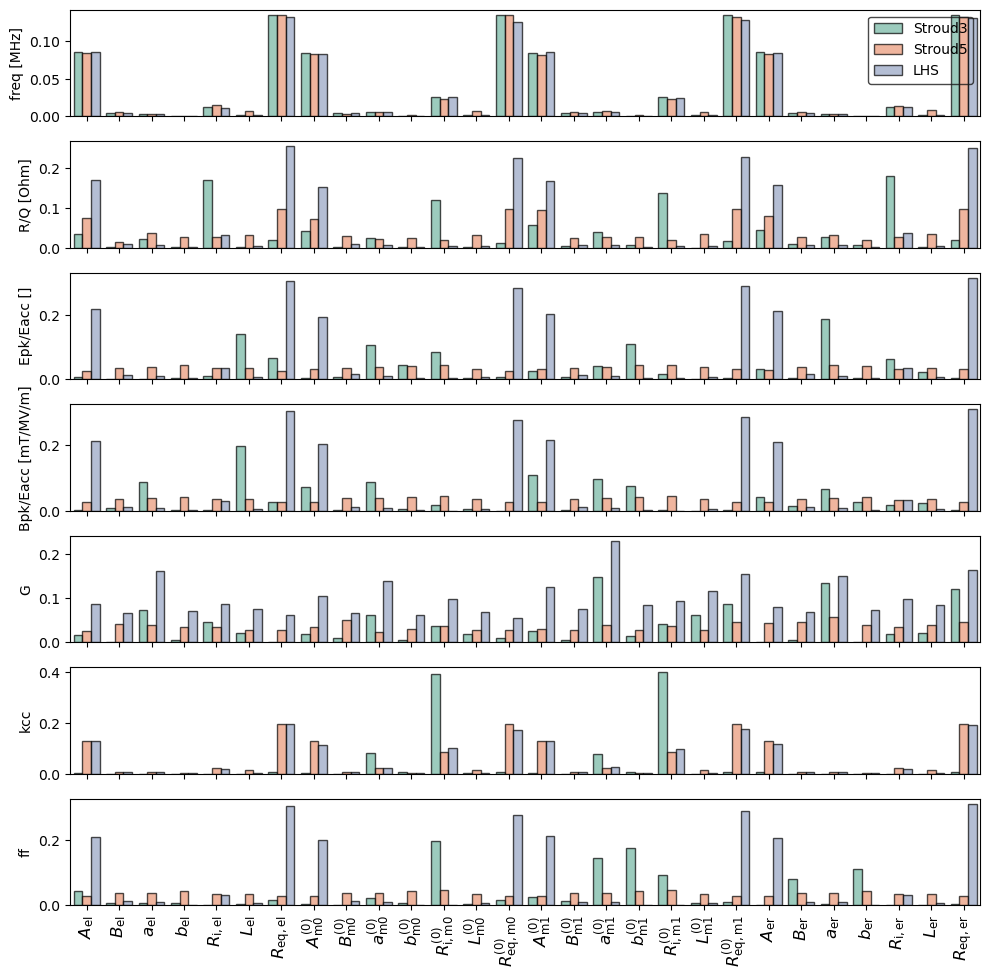

In [227]:
fig, axes = plt.subplots(7, figsize=(10,10), sharex=True)
pars = df_1.columns
x_ticks_label = ['$A_{\mathrm{el}}$', '$B_{\mathrm{el}}$', '$a_{\mathrm{el}}$', '$b_{\mathrm{el}}$', '$R_{\mathrm{i, el}}$', '$L_{\mathrm{el}}$', '$R_{\mathrm{eq, el}}$',
                 '$A^{(0)}_{\mathrm{m0}}$', '$B^{(0)}_{\mathrm{m0}}$', '$a^{(0)}_{\mathrm{m0}}$', '$b^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{i, m0}}$', '$L^{(0)}_{\mathrm{m0}}$', '$R^{(0)}_{\mathrm{eq, m0}}$',
                 '$A^{(0)}_{\mathrm{m1}}$', '$B^{(0)}_{\mathrm{m1}}$', '$a^{(0)}_{\mathrm{m1}}$', '$b^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{i, m1}}$', '$L^{(0)}_{\mathrm{m1}}$', '$R^{(0)}_{\mathrm{eq, m1}}$',  
                 '$A_{\mathrm{er}}$', '$B_{\mathrm{er}}$', '$a_{\mathrm{er}}$', '$b_{\mathrm{er}}$', '$R_{\mathrm{i, er}}$', '$L_{\mathrm{er}}$', '$R_{\mathrm{eq, er}}$']

ni = 0
for par in pars:
    if 'total' in par:
        # Concatenate the dataframes
        cols = ['Source', 'vars', par]
        combined_df = pd.concat([df_1[cols], df_2[cols], df_3[cols]])

        # Use seaborn barplot for comparison with hue based on 'Source'
    #     sns.barplot(x='vars', y=par, hue='Source', data=combined_df, errorbar=None, dodge=True)
            
        sns.barplot(combined_df, x="vars", y=par, hue='Source', alpha=0.7, linewidth=1.0, 
                    edgecolor="0.", ax=axes[ni], errorbar=None, dodge=True).set(ylabel=par.replace('_total', ''))
        # hidethe legend
        axes[ni].get_legend().set_visible(False)
        ni += 1


axes[0].legend(fancybox=True, facecolor='None', edgecolor='k', loc='upper right')
for ax in axes.flatten():
    ax.set_ylim(bottom=0)
    ax.tick_params(axis='x', rotation=90)
    ax.set(xlabel=None)
    
# plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.xticks(fontsize=12)
axes[-1].set_xticklabels(x_ticks_label)

plt.savefig(fr"D:\Dropbox\Quick presentation files\sobol_total_indices_comparison_c3794_vars28.png")
# Show the plot
plt.show()